In [157]:
import pandas as pd
import numpy as np
import seaborn as sns 

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

seed=42
np.random.seed = 42

In [158]:
usefullCollumns_list = ['id','usableAreas','totalAreas','parkingSpaces','address_zone','address_locationId'
,'address_neighborhood','suites','bedrooms','bathrooms','pricingInfos_price','pricingInfos_yearlyIptu'
,'pricingInfos_monthlyCondoFee','interestingFlag']

dtype_list = ['usableAreas','totalAreas','parkingSpaces','suites','bedrooms'
,'pricingInfos_price','pricingInfos_yearlyIptu','pricingInfos_monthlyCondoFee']

dataset = pd.read_csv('data/processed/train_cleaned.csv.gzip'
                      ,compression='gzip', sep =';')

dataset[[x for x in dtype_list]] = dataset[[x for x in dtype_list]].astype('float')

/home/willy/git/imoveis/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [169]:
datasetFilter=dataset[dataset['usableAreas']!=0]

In [159]:
dataset[usefullCollumns_list].sample(1)

,id,usableAreas,totalAreas,parkingSpaces,address_zone,address_locationId,address_neighborhood,suites,bedrooms,bathrooms,pricingInfos_price,pricingInfos_yearlyIptu,pricingInfos_monthlyCondoFee,interestingFlag
24743,0229f32847,70.00,70.00,2.00,Zona Oeste,BR>Sao Paulo>NULL>Sao Paulo>Zona Oeste>Jaguare,Jaguaré,1.00,3.00,2.00,"343,000.00",nan,420.00,False


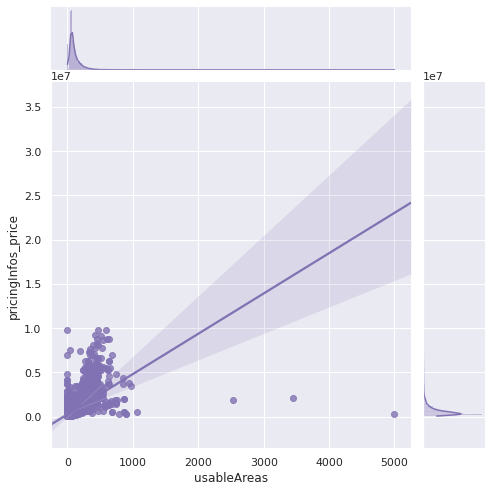

In [160]:
#amostra de 15%
_ = dataset[dataset['usableAreas']!=0]
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="usableAreas", y="pricingInfos_price"
                  ,data=dataset.sample(round(_.shape[0]*.20), random_state=seed)
                  ,kind="reg", truncate=False
                  ,color="m", height=7)

In [161]:
dataset[usefullCollumns_list].groupby('interestingFlag').count()[['id']]

,id
interestingFlag,
False,35034
True,27842


/home/willy/git/imoveis/env/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/willy/git/imoveis/env/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


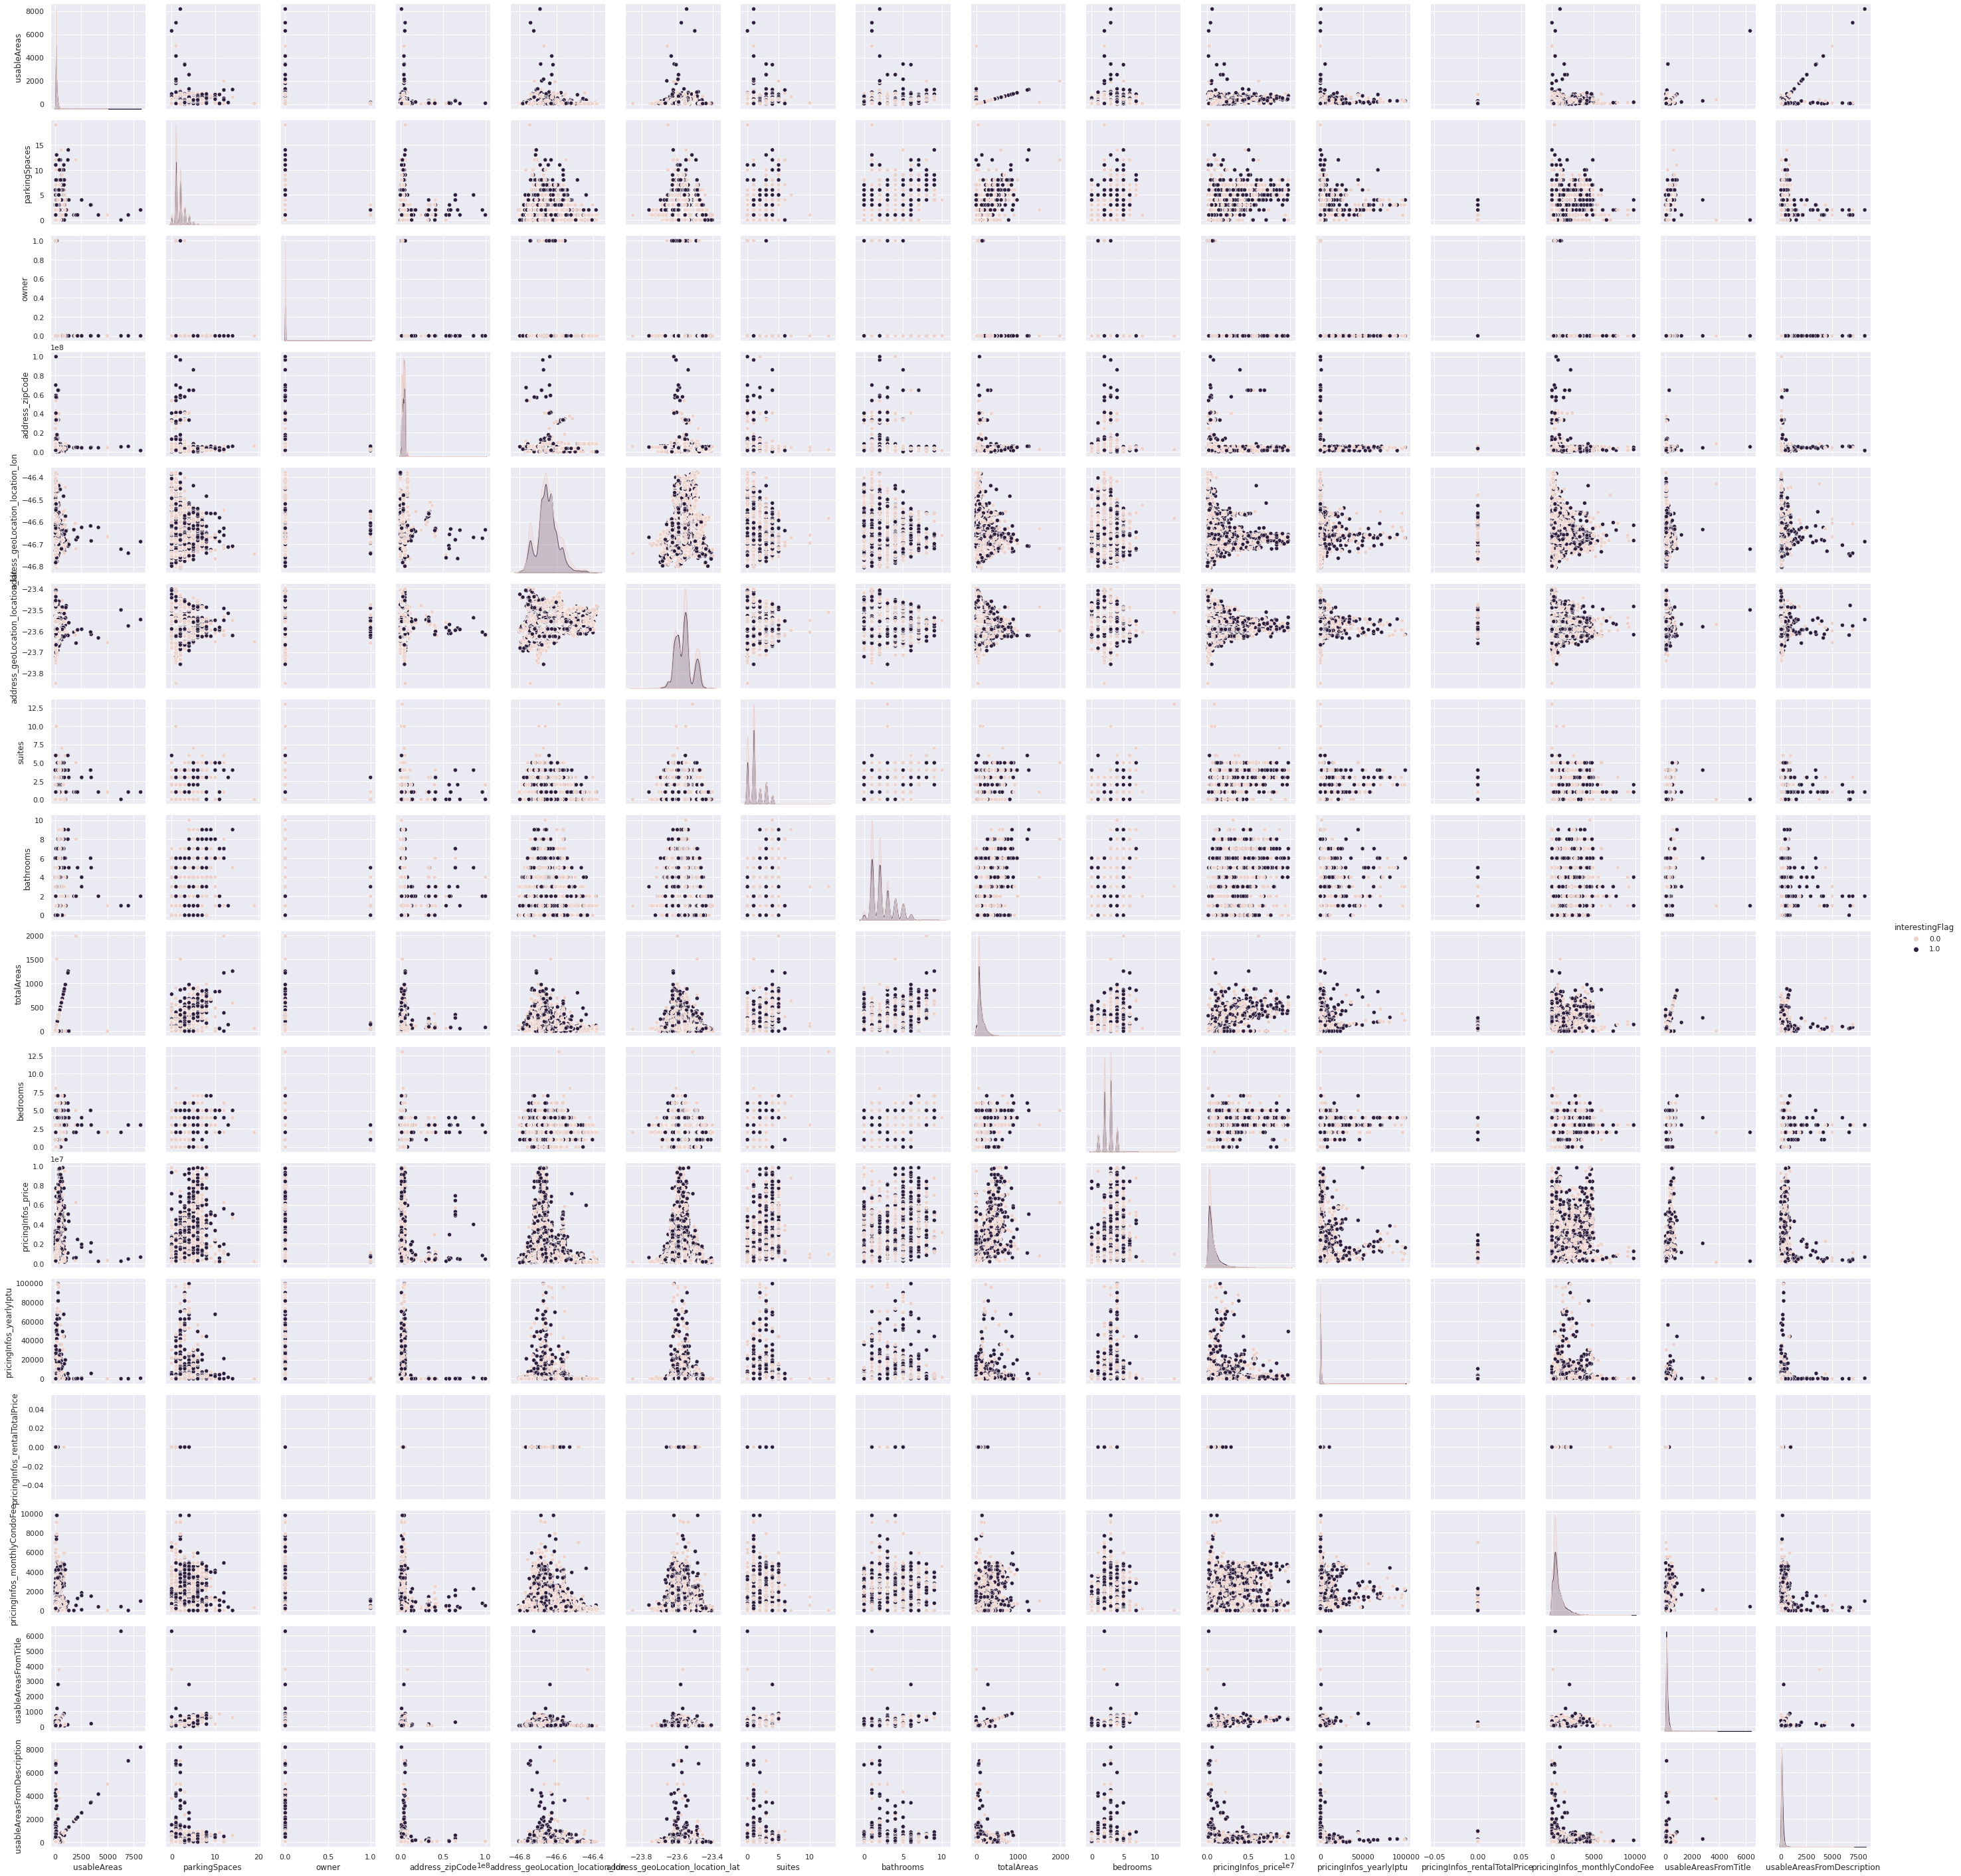

In [173]:
sns.pairplot(datasetFilter, hue="interestingFlag")
